In [1]:
import numpy as np
from scipy.stats import norm
from functools import partial
import matplotlib.pyplot as plt

def BSM(S, K, T, r, sigma, option='call'):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option == 'put':
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        print('Error: option type not recognized')
        
def plot(ax, x, y,label, x_label,y_label,diff,color,title):
    if diff==1:
        ax.plot(x[1:], y[1:]-y[:-1], label=label,color=color)
    elif diff==2:
        ax.plot(x[1:-1], y[2:]+y[:-2]-2*y[1:-1], label=label,color=color)
        
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()

C:\Users\61428\AppData\Local\Temp\ipykernel_33388\3057125831.py:7: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\61428\AppData\Local\Temp\ipykernel_33388\3057125831.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\61428\AppData\Local\Temp\ipykernel_33388\3010465209.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


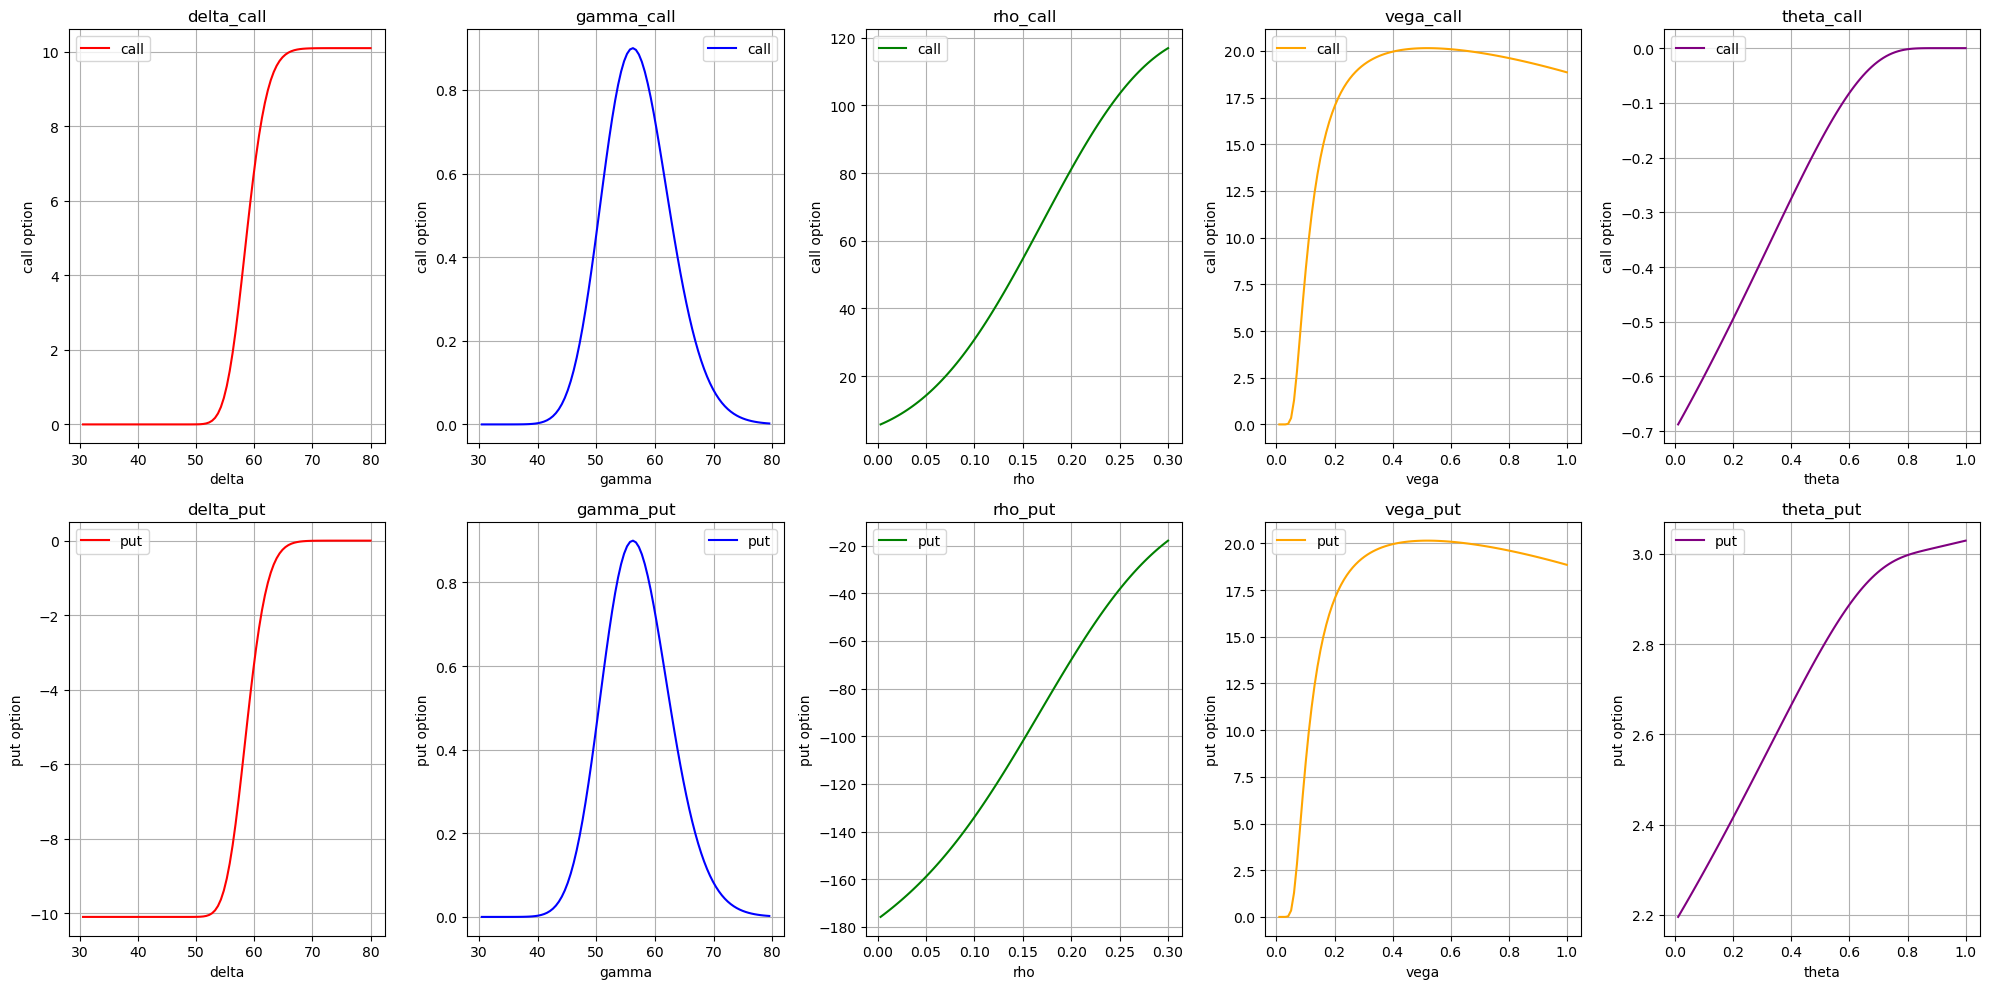

In [18]:
#S0 = 50,K = 60,T = 1,r = 0.05,sigma = 0.2
fig, ax = plt.subplots(2,5,figsize=(20,10))

options_price=np.array([BSM(i, 60, 1, 0.05, 0.1,'call') for i in np.linspace(0, 100, 100)]).reshape(-1)/0.1
plot(ax[0,0], np.linspace(30, 80, 100), options_price,'call','delta','call option',1,'red','delta_call')

options_price=np.array([BSM(i, 60, 1, 0.05, 0.1,'put') for i in np.linspace(0, 100, 100)]).reshape(-1)/0.1
plot(ax[1,0], np.linspace(30, 80, 100), options_price,'put','delta','put option',1,'red','delta_put')

options_price=np.array([BSM(i, 60, 1, 0.05, 0.1,'call') for i in np.linspace(30, 80, 100)]).reshape(-1)/(0.1)**2/2
plot(ax[0,1], np.linspace(30, 80, 100), options_price,'call','gamma','call option',2,'blue','gamma_call')

options_price=np.array([BSM(i, 60, 1, 0.05, 0.1,'put') for i in np.linspace(30, 80, 100)]).reshape(-1)/(0.1)**2/2
plot(ax[1,1], np.linspace(30, 80, 100), options_price,'put','gamma','put option',2,'blue','gamma_put')

options_price=np.array([BSM(50, 60, 1, i, 0.1,'call') for i in np.linspace(0, 0.3, 100)]).reshape(-1)/(0.001)
plot(ax[0,2], np.linspace(0, 0.3, 100), options_price,'call','rho','call option',1,'green','rho_call')

options_price=np.array([BSM(50, 60, 1, i, 0.1,'put') for i in np.linspace(0, 0.3, 100)]).reshape(-1)/(0.001)
plot(ax[1,2], np.linspace(0, 0.3, 100), options_price,'put','rho','put option',1,'green','rho_put')

options_price=np.array([BSM(50, 60, 1, 0.05, i,'call') for i in np.linspace(0, 1, 100)]).reshape(-1)/(0.01)
plot(ax[0,3], np.linspace(0, 1, 100), options_price,'call','vega','call option',1,'orange','vega_call')

options_price=np.array([BSM(50, 60, 1, 0.05, i,'put') for i in np.linspace(0, 1, 100)]).reshape(-1)/(0.01)
plot(ax[1,3], np.linspace(0, 1, 100), options_price,'put','vega','put option',1,'orange','vega_put')

options_price=np.array([BSM(50, 60, 1-i, 0.05, 0.1,'call') for i in np.linspace(0, 1, 100)]).reshape(-1)/(0.01)
plot(ax[0,4], np.linspace(0, 1, 100), options_price,'call','theta','call option',1,'purple','theta_call')

options_price=np.array([BSM(50, 60, 1-i, 0.05, 0.1,'put') for i in np.linspace(0, 1, 100)]).reshape(-1)/(0.01)
plot(ax[1,4], np.linspace(0, 1, 100), options_price,'put','theta','put option',1,'purple','theta_put')

fig.tight_layout()
fig.show()